#           SHALE ANALYTICS  : PART 1 

# PROBLEM STATEMENT : To find the impact of the different variables on the production of the gas and condensate from a dataset of 136 wells with 35 parameters 

Introduction:

Shale Analytics encompasses any and all data-driven techniques,workflows, and solutions that attempt to increase recovery and productionefficiency from shale plays

In [1]:
# Importing all the python dependencies for statistical analyis

import numpy as np
from sklearn import neural_network, linear_model,feature_selection
import pandas as pd
import numpy.matlib
import matplotlib
from pandas import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
%matplotlib inline

Reading the Shale analytics dataset

In [2]:
# making a pandas dataframe from the dataset
dataset = pd.read_excel("C:/Users/Akshay Arora/Downloads/Machine_Learning_Task/Data-Shale Analytics Project.xls")

In [3]:
# Displaying the first 5 rows and columns of the dataset
dataset.head()

,Well Name,Easting,Northing,MD,TVD,Azimuth,Inclination,Deviation-DownDip,Deviation-UpDip,Deviation-NoDip,...,Stim-Maximum propant Conc-(lb-gal),Stim-Proppant per stage(lb),30 Day Cum Gas (MCF),30 Day Cum Condensate (bbls),90 Day Cum Gas (MCF),90 Day Cum Condensate (bbls),120 Day Cum Gas (MCF),120 Day Cum Condensate (bbls),180 Day -Cum Gas (MCF),180 Day -Cum Condensate (bbls)
0,ISI-001,1.681170e+06,1.593775e+07,10383,6563.2,123.7,91.4,1,0,0,...,3,492337,200140,207,489665,708.24,616456,954.63,831975.0,1193.98
1,ISI-002,1.680955e+06,1.593699e+07,10980,6557.3,122.4,90.5,1,0,0,...,3,507210,227485,509,544380,1010.74,678884,1257.13,913560.0,1496.49
2,ISI-003,1.671400e+06,1.591481e+07,9990,6580.0,154.4,90.9,1,0,0,...,3,511521,108705,505,275020,1417.44,366865,1771.62,513561.0,2023.93
3,ISI-004,1.672552e+06,1.591550e+07,10180,6610.7,137.8,89.4,1,0,0,...,3,503191,91710,449,223947,1363.21,294291,1831.07,412134.0,2160.03
4,ISI-005,1.673250e+06,1.591585e+07,11060,6583.3,149.9,91.7,1,0,0,...,3,504971,103792,448,250151,1363.21,331657,1779.65,475471.0,2141.63


# Segregating all the variables from the shale dataset

In [4]:
# Well Paramaters 
wellParams=dataset.iloc[:,1:10]
# Reservoir Paramters
reservoirParams=dataset.iloc[:,10:15]
# Completion Paramters
completionParams=dataset.iloc[:,15:21]
# stimulation Paramters
stimParams=dataset.iloc[:,21:28]
# Natural Parameters = "Well parametes and Reservoir Parameters"
naturalParams=dataset.iloc[:,1:15]
# Design Parameters = "Completion Parameters and Stimulation Parameters"
designParams=dataset.iloc[:,15:28]

# Well Parameters

In [5]:
# Displaying the first 5 rows and columns of the Well Parameters

wellParams.head()

,Easting,Northing,MD,TVD,Azimuth,Inclination,Deviation-DownDip,Deviation-UpDip,Deviation-NoDip
0,1.681170e+06,1.593775e+07,10383,6563.2,123.7,91.4,1,0,0
1,1.680955e+06,1.593699e+07,10980,6557.3,122.4,90.5,1,0,0
2,1.671400e+06,1.591481e+07,9990,6580.0,154.4,90.9,1,0,0
3,1.672552e+06,1.591550e+07,10180,6610.7,137.8,89.4,1,0,0
4,1.673250e+06,1.591585e+07,11060,6583.3,149.9,91.7,1,0,0


# Reservoir Parameters

In [6]:
# Displaying the first 5 rows and columns of the Reservoir Parameters
reservoirParams.head()
#reservoirParams.keys()

,Porosity%,Gross Thickness(ft),NTG,Sw(%),TOC %
0,9.1,156.0,0.91,10.0,3.3
1,9.3,156.0,0.92,10.0,3.3
2,9.4,176.0,0.87,11.7,2.8
3,9.3,176.0,0.87,11.6,2.8
4,8.9,175.0,0.90,12.0,2.8


# Completion Parameters

In [7]:
# Displaying the first 5 rows and columns of the Completion Parameters

completionParams.head()
#completionParams.keys()

,Comp-Perforated Lateral (ft),Comp-Stimulated Lateral Length (ft),Comp-Clusters per Stage,Comp-Shot Density (shots-ft),Comp-Avg Stage Length(ft),Comp-Number of Stages
0,3363,3463,3.0,4.0,280.3,12
1,4022,4122,3.0,4.0,287.3,14
2,2903,3003,3.0,4.0,290.3,10
3,2603,2703,3.0,4.0,289.2,9
4,2903,3003,3.0,4.0,290.3,10


# Stimulation Parameters

In [8]:
# Displaying the first 5 rows and columns of the Stimulation Parameters

stimParams.head()
#stimParams.keys()

,Stim-Avg. Tr. Pressure (psi),Stim-Avg. Tr. Rate (bbl-min),Stim-Fluid volume per Stage (bbl),Stim-clean volume per Stage (bbl),Stim-Slurry volume per Stage (bbl),Stim-Maximum propant Conc-(lb-gal),Stim-Proppant per stage(lb)
0,6107,70.7,22299,12509,9790,3,492337
1,6040,71.3,22168,12439,9729,3,507210
2,6441,69.5,24262,13637,10625,3,511521
3,6605,69.4,23879,13424,10455,3,503191
4,6602,69.4,24379,13710,10668,3,504971


# Natural Parameters

In [9]:
# Displaying the first 5 rows and columns of the Natural Parameters

naturalParams.head()

,Easting,Northing,MD,TVD,Azimuth,Inclination,Deviation-DownDip,Deviation-UpDip,Deviation-NoDip,Porosity%,Gross Thickness(ft),NTG,Sw(%),TOC %
0,1.681170e+06,1.593775e+07,10383,6563.2,123.7,91.4,1,0,0,9.1,156.0,0.91,10.0,3.3
1,1.680955e+06,1.593699e+07,10980,6557.3,122.4,90.5,1,0,0,9.3,156.0,0.92,10.0,3.3
2,1.671400e+06,1.591481e+07,9990,6580.0,154.4,90.9,1,0,0,9.4,176.0,0.87,11.7,2.8
3,1.672552e+06,1.591550e+07,10180,6610.7,137.8,89.4,1,0,0,9.3,176.0,0.87,11.6,2.8
4,1.673250e+06,1.591585e+07,11060,6583.3,149.9,91.7,1,0,0,8.9,175.0,0.90,12.0,2.8


# Design Parameters

In [10]:
# Displaying the first 5 rows and columns of the Design Parameters

designParams.head()

,Comp-Perforated Lateral (ft),Comp-Stimulated Lateral Length (ft),Comp-Clusters per Stage,Comp-Shot Density (shots-ft),Comp-Avg Stage Length(ft),Comp-Number of Stages,Stim-Avg. Tr. Pressure (psi),Stim-Avg. Tr. Rate (bbl-min),Stim-Fluid volume per Stage (bbl),Stim-clean volume per Stage (bbl),Stim-Slurry volume per Stage (bbl),Stim-Maximum propant Conc-(lb-gal),Stim-Proppant per stage(lb)
0,3363,3463,3.0,4.0,280.3,12,6107,70.7,22299,12509,9790,3,492337
1,4022,4122,3.0,4.0,287.3,14,6040,71.3,22168,12439,9729,3,507210
2,2903,3003,3.0,4.0,290.3,10,6441,69.5,24262,13637,10625,3,511521
3,2603,2703,3.0,4.0,289.2,9,6605,69.4,23879,13424,10455,3,503191
4,2903,3003,3.0,4.0,290.3,10,6602,69.4,24379,13710,10668,3,504971


# 30 days Cummulative Gas Production  

In [11]:
# 30 days Cummulative Gas Production 

Day30CumGas= dataset.iloc[:,28]
Day30CumGas.head()

0    200140
1    227485
2    108705
3     91710
4    103792
Name: 30 Day Cum Gas (MCF), dtype: int64

# Feature Visualization :  Histograms and Regression Fits

# Reservoir Parameter Plots 

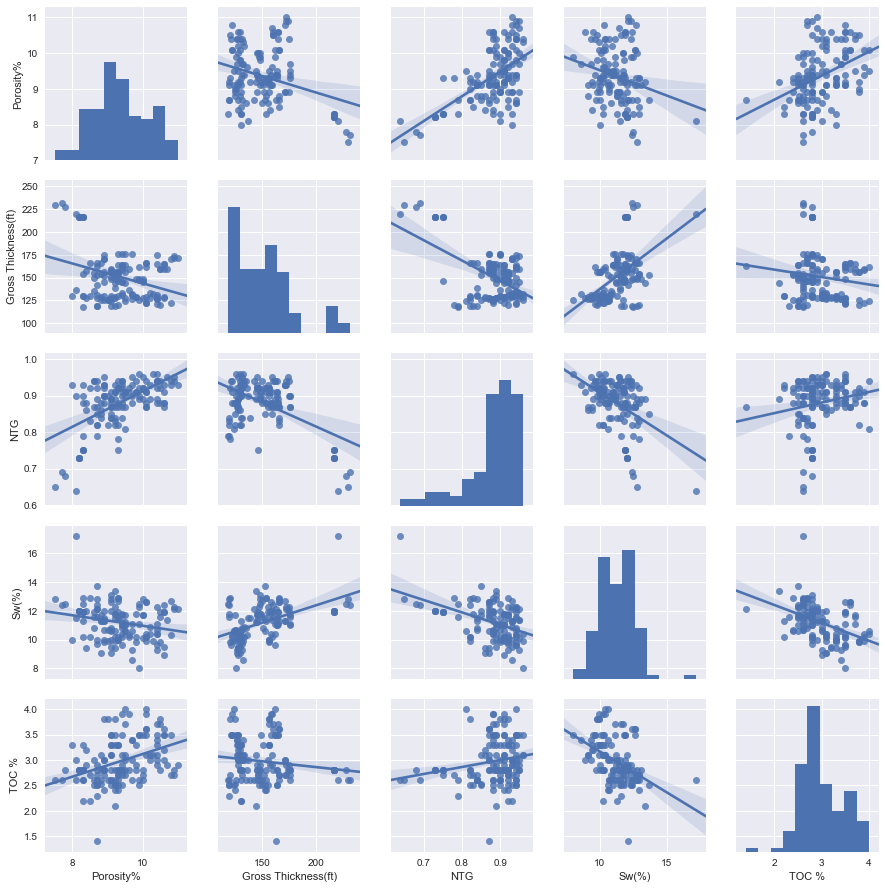

In [12]:
sns.pairplot(reservoirParams,kind='reg')

# Completion Parameter Plots 

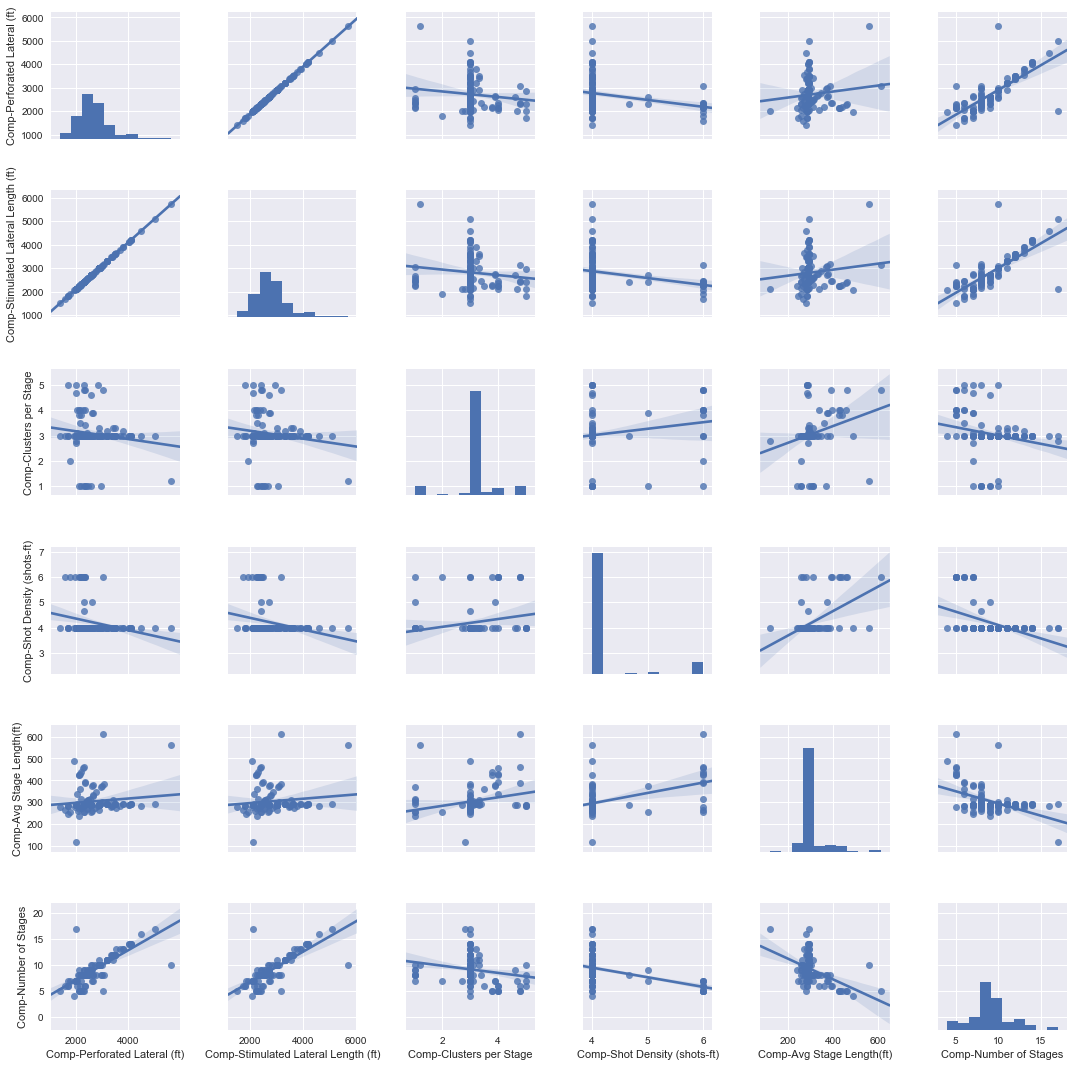

In [13]:
sns.pairplot(completionParams,kind='reg')

# Stimulation Parameter Plots 

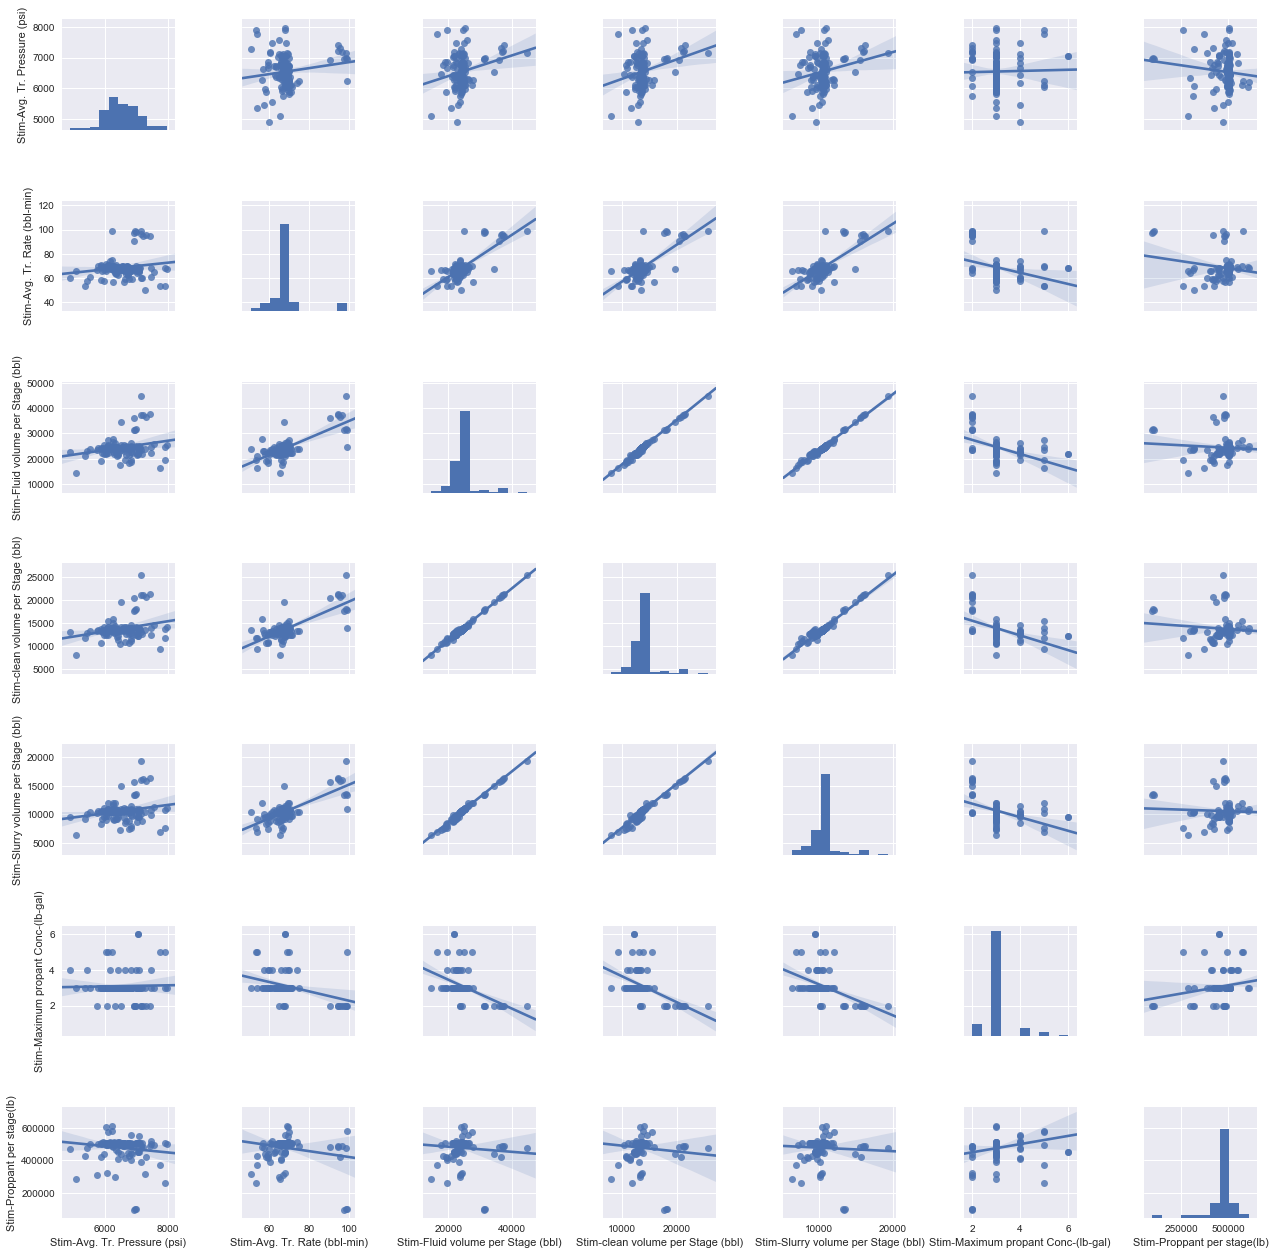

In [14]:
sns.pairplot(stimParams,kind='reg')

# Reservoir Features vs 30 Day Cummulative Gas 

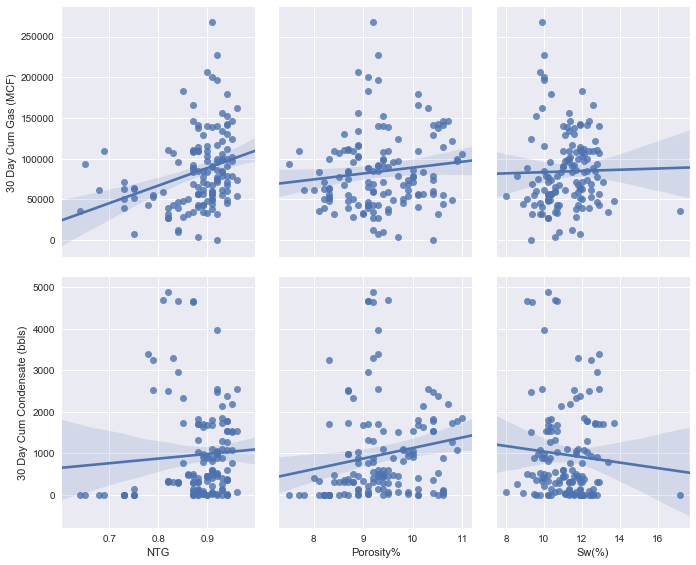

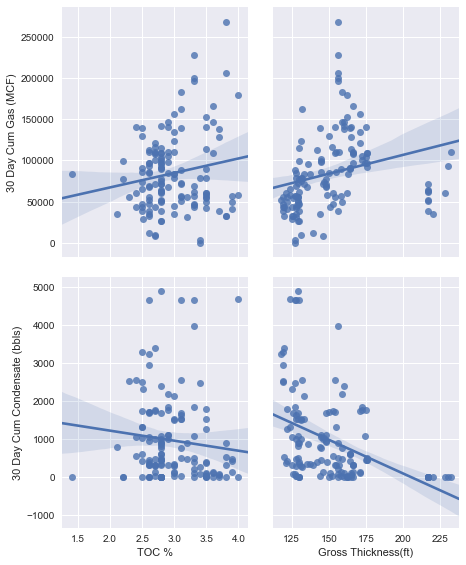

In [15]:
sns.pairplot(data=dataset, x_vars=["NTG", "Porosity%","Sw(%)"], y_vars=["30 Day Cum Gas (MCF)","30 Day Cum Condensate (bbls)"],
             size=4, aspect=0.8, kind="reg");
sns.pairplot(data=dataset, x_vars=["TOC %","Gross Thickness(ft)"], y_vars=["30 Day Cum Gas (MCF)","30 Day Cum Condensate (bbls)"],
             size=4, aspect=0.8, kind="reg");

# Completion Features vs 30 Day Cummulative Gas and 30 Day Cummulative Condensate

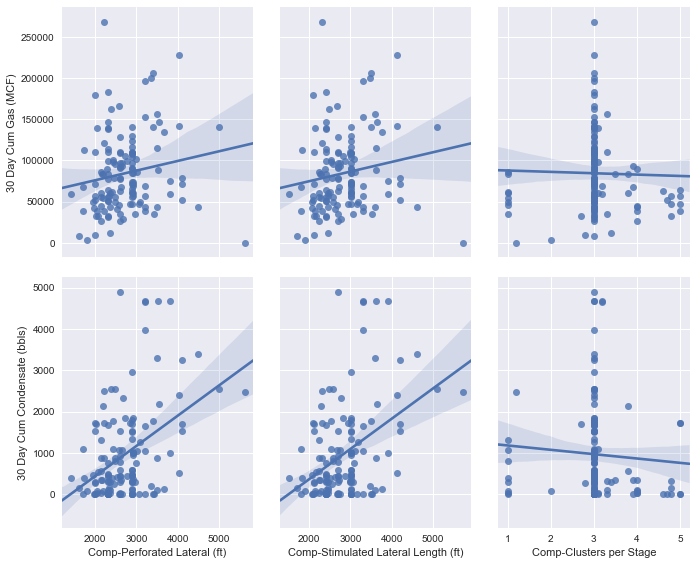

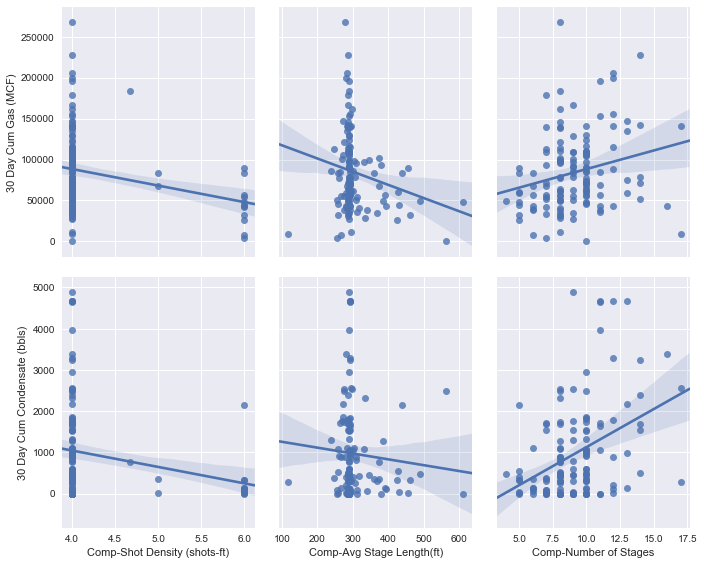

In [16]:
sns.pairplot(data=dataset, x_vars=['Comp-Perforated Lateral (ft)', 'Comp-Stimulated Lateral Length (ft)',
       'Comp-Clusters per Stage'], y_vars=["30 Day Cum Gas (MCF)","30 Day Cum Condensate (bbls)"],
             size=4, aspect=0.8, kind="reg");

sns.pairplot(data=dataset, x_vars=['Comp-Shot Density (shots-ft)',
       'Comp-Avg Stage Length(ft)', 'Comp-Number of Stages'], y_vars=["30 Day Cum Gas (MCF)","30 Day Cum Condensate (bbls)"],
             size=4, aspect=0.8, kind="reg")

# Stimulation Features vs 30 Day Cummulative Gas 

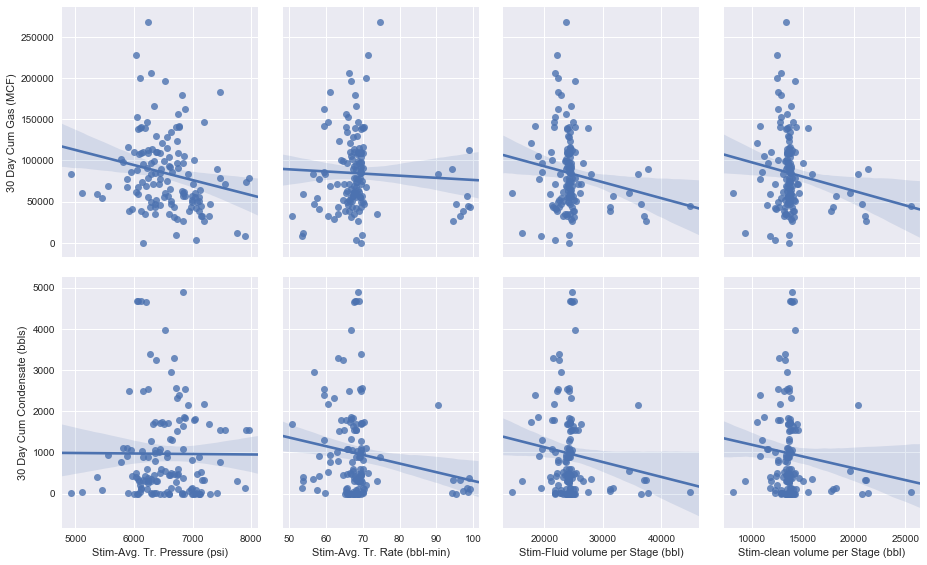

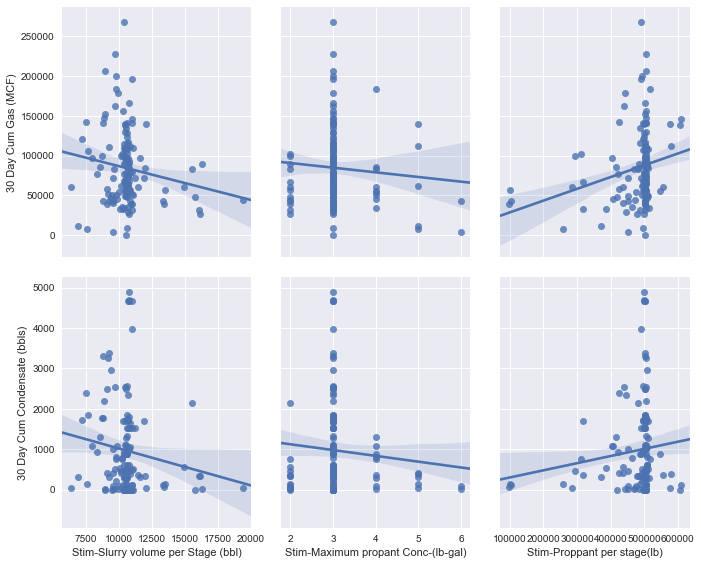

In [17]:
sns.pairplot(data=dataset, x_vars=['Stim-Avg. Tr. Pressure (psi)', u'Stim-Avg. Tr. Rate (bbl-min)','Stim-Fluid volume per Stage (bbl)','Stim-clean volume per Stage (bbl)',
], y_vars=["30 Day Cum Gas (MCF)","30 Day Cum Condensate (bbls)"],
             size=4, aspect=0.8, kind="reg");

sns.pairplot(data=dataset, x_vars=['Stim-Slurry volume per Stage (bbl)','Stim-Maximum propant Conc-(lb-gal)', 'Stim-Proppant per stage(lb)'], y_vars=["30 Day Cum Gas (MCF)","30 Day Cum Condensate (bbls)"],
             size=4, aspect=0.8, kind="reg");

# Key Performance Indicators : 

Based on the F-scores and the p-values of the cross -correlation. 

This is done is two steps : 


1) The cross correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y))


2) It is converted to an F score then to a p-value.

# 1) Best Reservoir Paramaters    :  Key Perfomance Indicators

In [18]:
X1=reservoirParams
y=Day30CumGas
f1,p1=feature_selection.f_regression(X1,y)
f1,p1

(array([  1.98957032,   9.81118843,  13.44665462,   0.05300214,   3.91105801]),
 array([  1.60703004e-01,   2.13048281e-03,   3.52858381e-04,
          8.18270399e-01,   5.00212710e-02]))

According to these analysis for RESERVOIR:  The Key Performance Indicators are : 
    
  1) NTG
  
  2) Gross Thickness
  
  3) Water Satuaration (Sw) 
    

# 2) Best Completion Paramaters :  Key Perfomance Indicators

In [19]:
X2=completionParams
f2,p2=feature_selection.f_regression(X2,y)
f2,p2

(array([ 3.67741142,  3.67741142,  0.09454883,  8.92890743,  5.44994318,
         7.81353833]),
 array([ 0.05728225,  0.05728225,  0.75894939,  0.00333957,  0.02105539,
         0.00594773]))

According to these analysis for COMPLETION: The Key Performance Indicators are : 
    
  1) Number of Stages
  
  2) Shot - Density (Shots-ft)
  
  3) Avg - Stage Length 
    

# 3) Best Stimulation Paramaters  :  Key Perfomance Indicators

In [20]:
X3=stimParams
f3,p3=feature_selection.f_regression(X3,y)
f3,p3

(array([ 5.8009973 ,  0.31639244,  3.57414551,  3.63320127,  3.40162319,
         0.92407645,  8.52164566]),
 array([ 0.01737725,  0.57472357,  0.06084494,  0.05877926,  0.0673407 ,
         0.33813832,  0.004118  ]))

According to these analysis for STIMULATION:The Key Performance Indicators are : 
    
  1) Proppant per Stage (lb)
  
  2) Tr_Pressure (psi)
  
  3) Clean Volume per Stage (bbl) 
    

# 4) Best OverAll Paramaters        :  Key Perfomance Indicators



According to these analysis for All Parameters:  The OVER ALL Performance Indicators are : 


  1) NTG
  
  2) Gross Thickness
  
  3) Water Satuaration (Sw) 
  
  4) Number of Stages
  
  5) Shot - Density (Shots-ft)
  
  6) Avg - Stage Length 
    
  7) Proppant per Stage (lb)
  
  8) Tr_Pressure (psi)
  
  9) Clean Volume per Stage (bbl
  
    

# Impact of Natural vs Design Parameters

The Natural parameters are Well and the Reservoir characteristics
such as porosity, pay thickness, net to gross ratio (NTG), initial water
saturation, and total organic content (TOC).


The design parameters include the completion and stimulation design characteristics such as the shot density, perforated/stimulated lateral length, number of stages, distance between stages, number of clusters per stage, amount of injected clean water, rate of injection, injection pressure, amount of injected slurry, proppant per stage 


# 5) Best Natural (Native) Paramaters         :  Key Perfomance Indicators

In [21]:
X5=naturalParams
f5,p5=feature_selection.f_regression(X5,y)
f5,p5

(array([  2.83796845e+01,   3.35998421e-01,   4.05929508e+00,
          3.80388463e+00,   4.24424588e+00,   8.37762699e-01,
          2.38416448e+00,   2.20196840e+00,   1.13649242e-02,
          1.98957032e+00,   9.81118843e+00,   1.34466546e+01,
          5.30021437e-02,   3.91105801e+00]),
 array([  4.09988303e-07,   5.63121461e-01,   4.59297799e-02,
          5.32212781e-02,   4.13187040e-02,   3.61681591e-01,
          1.24928787e-01,   1.40183023e-01,   9.15260678e-01,
          1.60703004e-01,   2.13048281e-03,   3.52858381e-04,
          8.18270399e-01,   5.00212710e-02]))

According to these analysis for Natural Parameters :  The Key Performance Indicators are : 

  1) Easting
  
  2) TVD
  
  3) Azimuth
    
  4) NTG
  
  5) Gross Thickness
  
  6) Water Satuaration (Sw) 
    

# 5) Best Design Paramaters         :  Key Perfomance Indicators

In [22]:
X4=designParams
f4,p4=feature_selection.f_regression(X4,y)
f4,p4

(array([ 3.67741142,  3.67741142,  0.09454883,  8.92890743,  5.44994318,
         7.81353833,  5.8009973 ,  0.31639244,  3.57414551,  3.63320127,
         3.40162319,  0.92407645,  8.52164566]),
 array([ 0.05728225,  0.05728225,  0.75894939,  0.00333957,  0.02105539,
         0.00594773,  0.01737725,  0.57472357,  0.06084494,  0.05877926,
         0.0673407 ,  0.33813832,  0.004118  ]))

According to these analysis for DESIGN PARAMETERs :  The Key Performance Indicators are : 
    
  1) Proppant per Stage (lb)
  
  2) Number of Stages
  
  3) Avg - Stage Length
    